In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from src.bandits import RandomizedStochasticBandit, BaseStochasticBandit
from src.agents import ExploreExploit, OptimalEpsGreedy, UCB, Thompson
from src.arms import UniformArm, GaussianArm, BernoulliArm

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.dpi'] = 300

In [3]:
K = 5

# prior 
alpha = 1
beta = 1

arm_factory = BernoulliArm.factory(alpha, beta)
arms = [arm_factory() for i in range(K)]
arm_means = [arm.mu for arm in arms]
bandit = BaseStochasticBandit(arms)

Multi-Armed Bandit Problem
 K=5
 mu_star = 0.8090299022763408
 a_star  = 0

Bernoulli Arm mu 0.8090299022763408, 
Posterior is 1, 1

Bernoulli Arm mu 0.38637426286629734, 
Posterior is 1, 1

Bernoulli Arm mu 0.15014787054114068, 
Posterior is 1, 1

Bernoulli Arm mu 0.4131530770869628, 
Posterior is 1, 1

Bernoulli Arm mu 0.19849458162730743, 
Posterior is 1, 1



In [4]:
N_seeds = 10
T = 10000

agent_classes = [Thompson, UCB, lambda x, y: ExploreExploit(x, 1, y, opt=True), lambda x, y: OptimalEpsGreedy(x, 0.01, T)]
agent_names = ["Thompson", "UCB", "Explore-First", "$\epsilon$-Greedy"]
agent_mats = [np.zeros((N_seeds, T+1)) for i in range(len(agent_classes))]

def run_agent(agent):
    crs = []

    while not agent.terminated():
        reward, cum_reward, a_t = agent.step()
        crs.append(cum_reward)
    
    return np.array(crs)


for i, agent_class in enumerate(agent_classes):
    for seed in range(N_seeds):
        bandit.reset(False)
        agent = agent_class(bandit, T)
        agent_mats[i][seed, :] = run_agent(agent)

/Users/mrinank/.local/share/virtualenvs/bandits-Gnc3imhh/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mrinank/.local/share/virtualenvs/bandits-Gnc3imhh/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


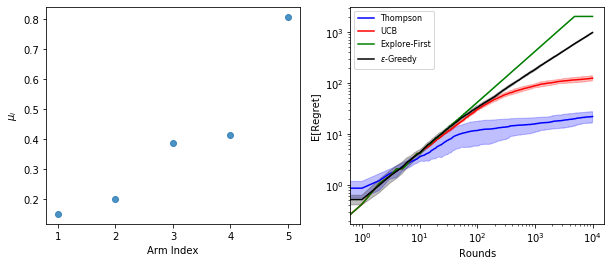

In [5]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.regplot(x = np.arange(1, K+1), y=sorted(arm_means), fit_reg=False)
plt.xlabel("Arm Index");
plt.ylabel("$\mu_i$");

plt.subplot(1, 2, 2)
xs = np.arange(0, T+1)
colors = ['b', 'r', 'g', 'k']
ax = plt.gca()

for indx, agent_mat in enumerate(agent_mats):
    r_mat = agent_mats[indx]
    mu = np.mean(r_mat, axis=0)
    std = np.std(r_mat, axis=0)
    
    plt.fill_between(xs, mu - std, mu + std, alpha=0.25, color = colors[indx])
    plt.plot(mu, color = colors[indx], label=f"{agent_names[indx]}")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('E[Regret]')
    plt.legend(prop={'size': 8})

plt.savefig("bernoulli.pdf")

In [6]:
K = 10

# prior 
mu_p = 0.5
sigma_p = 1
sigma_n = 0.1


arm_factory = GaussianArm.factory(mu_p, sigma_p, sigma_n)
arms = [arm_factory() for i in range(K)]
arm_means = [arm.mu for arm in arms]
bandit = BaseStochasticBandit(arms)

Multi-Armed Bandit Problem
 K=10
 mu_star = 1.9714198657110933
 a_star  = 4

Gaussian Arm mu 1.3897186253548948, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu -0.5564541261172735, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 1.425994660433691, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu -0.09540825654419682, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 1.9714198657110933, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 1.4457406372314718, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 0.6489646130201173, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 1.1742660267689455, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 0.10678049421636371, sigma 0.1.
Posterior is 0.5, 1

Gaussian Arm mu 0.4241377404687741, sigma 0.1.
Posterior is 0.5, 1



In [7]:
N_seeds = 7
T = 10000

agent_classes = [Thompson, Thompson, Thompson, UCB, lambda x, y: ExploreExploit(x, 1, y, opt=True), lambda x, y: OptimalEpsGreedy(x, 0.01, T)]
agent_names = ["Thompson Correct Prior", "Thompson Wrong Prior A", "Thompson Wrong Prior B", "UCB", "Explore-First", "$\epsilon$-Greedy"]
agent_mats = [np.zeros((N_seeds, T+1)) for i in range(len(agent_classes))]

def run_agent(agent):
    crs = []

    while not agent.terminated():
        reward, cum_reward, a_t = agent.step()
        crs.append(cum_reward)
    
    return np.array(crs)


for i, agent_class in enumerate(agent_classes):
    for seed in range(N_seeds):
        for arm in bandit.arms:
            if agent_names[i] == "Thompson Wrong Prior A":
                arm.prior_mu = 1
                arm.prior_sigma = 0.25
            elif agent_names[i] == "Thompson Wrong Prior B":
                arm.prior_mu = -1
                arm.prior_sigma = 0.25
            else:
                arm.prior_mu = mu_p
                arm.prior_sigma = sigma_p
    
        bandit.reset(False)
        agent = agent_class(bandit, T)
        agent_mats[i][seed, :] = run_agent(agent)

/Users/mrinank/.local/share/virtualenvs/bandits-Gnc3imhh/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mrinank/.local/share/virtualenvs/bandits-Gnc3imhh/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


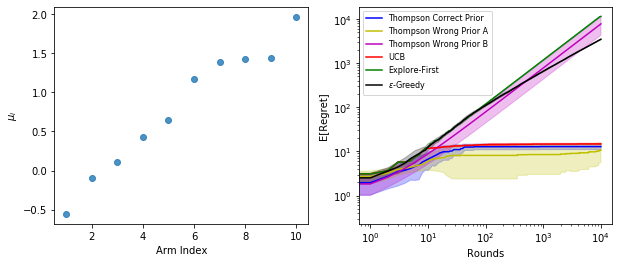

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.regplot(x = np.arange(1, K+1), y=sorted(arm_means), fit_reg=False)
plt.xlabel("Arm Index");
plt.ylabel("$\mu_i$");

plt.subplot(1, 2, 2)
xs = np.arange(0, T+1)
colors = ['b','y', 'm', 'r', 'g', 'k']
ax = plt.gca()

for indx, agent_mat in enumerate(agent_mats):
    r_mat = agent_mats[indx]
    mu = np.mean(r_mat, axis=0)
    std = np.std(r_mat, axis=0)
    
    plt.fill_between(xs, mu - std, mu + std, alpha=0.25, color = colors[indx])
    plt.plot(mu, color = colors[indx], label=f"{agent_names[indx]}")
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('E[Regret]')
    plt.legend(prop={'size': 8})
    
plt.savefig("gaussian.pdf")